In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
df_fraud = pd.read_csv("fraud_oracle.csv")

In [3]:
df_fraud.sample(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
9434,Aug,2,Thursday,Mazda,Urban,Friday,Aug,2,Female,Married,...,6 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1995,Collision
15062,Nov,3,Wednesday,Pontiac,Urban,Monday,Nov,3,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1996,Liability
12157,Mar,1,Friday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1996,Collision
7202,Jun,2,Monday,Toyota,Urban,Monday,Jun,2,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,Collision
3072,Dec,2,Monday,Mazda,Urban,Friday,Dec,4,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
# Drop irrelevant columns
df_fraud_cleaned = df_fraud.drop(columns=["PolicyNumber", "RepNumber"], errors='ignore')

In [5]:
df_fraud.sample(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
12969,Apr,5,Friday,Pontiac,Urban,Tuesday,May,1,Male,Single,...,more than 7,41 to 50,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
10212,Jul,2,Friday,Mazda,Urban,Friday,Jul,2,Male,Married,...,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1995,Liability
7317,Jul,1,Monday,Honda,Urban,Saturday,Jul,3,Male,Married,...,more than 7,41 to 50,No,No,External,more than 5,no change,1 vehicle,1995,Liability
3840,May,2,Thursday,Honda,Urban,Friday,May,2,Male,Married,...,6 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils
5846,May,3,Sunday,Pontiac,Urban,Monday,May,3,Male,Married,...,more than 7,51 to 65,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils


In [6]:
# Encode categorical variables
categorical_cols = df_fraud_cleaned.select_dtypes(include=["object"]).columns
label_encoders = {}

In [7]:
for col in categorical_cols:
    le = LabelEncoder()
    df_fraud_cleaned[col] = le.fit_transform(df_fraud_cleaned[col])
    label_encoders[col] = le

In [8]:
# Define features and target variable
X = df_fraud_cleaned.drop(columns=["FraudFound_P"], errors='ignore')
y = df_fraud_cleaned["FraudFound_P"]

In [9]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Train Random Forest with class weighting
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [12]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.01      0.02       185

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.50      3084
weighted avg       0.94      0.94      0.91      3084



In [13]:
print("Confusion Matrix:")

Confusion Matrix:


In [14]:
print(confusion_matrix(y_test, y_pred))

[[2899    0]
 [ 183    2]]


In [15]:
roc_auc = roc_auc_score(y_test, y_proba)

In [16]:
print(f"AUC-ROC Score: {roc_auc}")

AUC-ROC Score: 0.8225399252305081


C:\Users\prash\AppData\Local\Temp\ipykernel_18668\2164074823.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="viridis")


Text(0, 0.5, 'Feature')

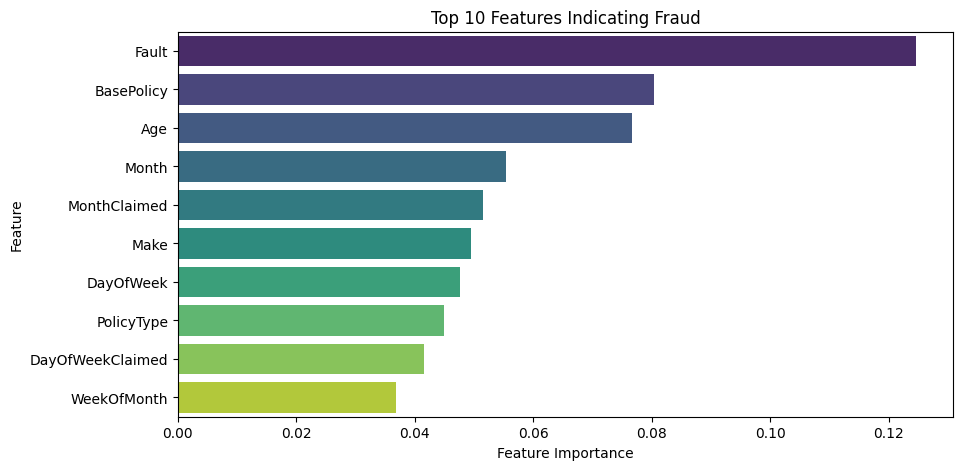

In [17]:
# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="viridis")
plt.title("Top 10 Features Indicating Fraud")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")